# Week 3 handin

## 01 Assignment
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
    1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url
8. Read student data into a list of Students from a csv file (Each student can appear on multiple lines):
    1. loop through the list and print each student with name, img_url and avg_grade.
    2. sort the list by avg_grade
    3. create a bar chart with student_name on x and avg_grade on y-axis
9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)  

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## 02 Status
I've decided not to make any of the extra assigments.

I feel as a lot of these assignments are left to be interpreted, which leaves room for error.  
One such case could be 7.A (7.1), what if a student has multiple courses, how would this be written into a CSV format?  
I feel that spending more time to figure out *what* the assignment wants you to do compared to actually coding it, is quite tedious.  

**Therefore I've decided not read from the CSV file and also only write the "student" information to the csv file to show a proof of concept.**  
Anything else in the assignment have been accounted for.

In [20]:
import statistics
import random

import csv

class Student():
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url

    def get_average_grade(self):
        return statistics.mean(self.data_sheet.get_grades_as_list())

    def get_progression(self):
        ECTS_MAX = 150
        ECTS_POINT_PER_SEMESTER = 30
        passed_courses = [grade for grade in self.data_sheet.get_grades_as_list() if grade > 0]
        return (ECTS_POINT_PER_SEMESTER * len(passed_courses)) / ECTS_MAX 


    def __str__(self):
        return f"name={self.name}, gender={self.gender}, image_url={self.image_url}, data_sheet={self.data_sheet} average_grade={self.get_average_grade()}, progression={self.get_progression()}"

    #Used for CSV Writer
    def __iter__(self):
        return iter([self.name, self.gender, self.image_url])


class DataSheet():
    def __init__(self, courses):
        self.courses = courses

    def get_grades_as_list(self):
        return [course[1] for course in self.courses]

    def __str__(self):
        string = ""
        for course in self.courses:
            string += f"{{{course[0]}, grade={course[1]}}}, "
        return string

class Course():
    def __init__(self, name, classroom, teacher, ects):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ects = ects
    
    def __str__(self):
        return f"name={self.name}, classroom={self.classroom}, teacher={self.teacher}, ects={self.ects}"

courses = [[Course("Spanish", "M-105", "Andrez Ipsum", 15), 12], [Course("English", "M-106", "Marie Ipsum", 15), 7]]

data_sheet = DataSheet(courses)
student = Student("Revus Ipsum", "male", data_sheet, "https://i1.sndcdn.com/avatars-ylM4tanwBXJZhjWb-X76mWw-t500x500.jpg")


data_sheet.get_grades_as_list()
student.get_average_grade()


def generate_students(amount=1):
    students = []

    courses = [Course("Spanish", "M-105", "Andrez Ipsum", 15), Course("English", "M-106", "Marie Ipsum", 15)]

    # No negative grades for simplicity...
    grades = [0, 2, 4, 7, 10, 12]

    firstnames = ["Niles", "Jupiter", "Mogens", "Pluto", "Ligma", "Figma", "Ninja", "Louise"]
    lastnames = ["Andersen", "Jørgensen", "Madsen", "Sørensen", "Christensen", "Dahlsen"]
    genders = ["male", "female"]
    avatars = ["https://i1.sndcdn.com/avatars-ylM4tanwBXJZhjWb-X76mWw-t500x500.jpg"]

    for _ in range(amount):
        name = random.choice(firstnames) + " " + random.choice(lastnames)
        gender = random.choice(genders)
        avatar = random.choice(avatars)

        # Requires there to be at least 1 course in predefined courses list.
        # Will pick a random sample of x amount of courses and add them with a random grade to a list.
        _courses = random.sample(courses, random.randint(1, len(courses)))
        _courses = [[course, random.choice(grades)] for course in _courses]

        students.append(Student(name, gender, DataSheet(_courses), avatar))

    return students

# I feel like this part of the exercise is left rather unambiguous.
# What if the student is assigned to multiple courses?
def write_students_to_csv(students):
    with open("resources/week3/students.csv", "w") as file:
        write = csv.writer(file)
        for student in students:
            write.writerow(list(student))
        print("Successfully wrote to file, " + file.name)


students = generate_students(5)
write_students_to_csv(students)

students.sort(key=lambda student: student.get_average_grade(), reverse=True)

for student in students:
    print(student)






Successfully wrote to file, resources/week3/students.csv
name=Figma Jørgensen, gender=female, image_url=https://i1.sndcdn.com/avatars-ylM4tanwBXJZhjWb-X76mWw-t500x500.jpg, data_sheet={name=Spanish, classroom=M-105, teacher=Andrez Ipsum, ects=15, grade=7},  average_grade=7, progression=0.2
name=Figma Jørgensen, gender=male, image_url=https://i1.sndcdn.com/avatars-ylM4tanwBXJZhjWb-X76mWw-t500x500.jpg, data_sheet={name=English, classroom=M-106, teacher=Marie Ipsum, ects=15, grade=2}, {name=Spanish, classroom=M-105, teacher=Andrez Ipsum, ects=15, grade=12},  average_grade=7, progression=0.4
name=Louise Jørgensen, gender=female, image_url=https://i1.sndcdn.com/avatars-ylM4tanwBXJZhjWb-X76mWw-t500x500.jpg, data_sheet={name=Spanish, classroom=M-105, teacher=Andrez Ipsum, ects=15, grade=2}, {name=English, classroom=M-106, teacher=Marie Ipsum, ects=15, grade=7},  average_grade=4.5, progression=0.4
name=Pluto Madsen, gender=female, image_url=https://i1.sndcdn.com/avatars-ylM4tanwBXJZhjWb-X76mWw-

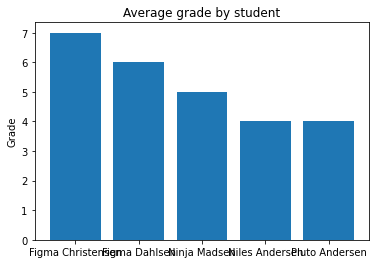

In [15]:
import matplotlib.pyplot as plt

x = [student.name for student in students]
y = [student.get_average_grade() for student in students]

plt.title("Average grade by student")
plt.ylabel("Grade")

plt.bar(x, y)
plt.show()

{0: 1, 10: 0, 20: 2, 30: 0, 40: 2, 50: 0, 60: 0, 70: 0, 80: 0, 90: 0, 100: 0}


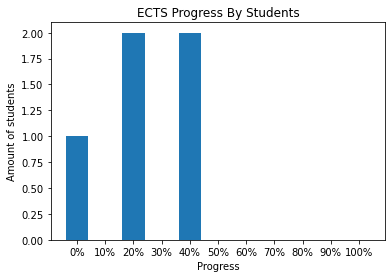

In [33]:
import matplotlib.pyplot as plt

# NOTE: Progress bars are split into percentage, while get_progression() returns the float value
progress = {0: 0, 10: 0, 20: 0, 30: 0, 40: 0, 50: 0, 60: 0, 70: 0, 80: 0, 90: 0, 100: 0}

# Very botched method to do this (?)
for key in progress.keys():
	for student in students:
		student_progress = student.get_progression() * 100

		if student_progress >= key and student_progress < (key + 10):

			progress[key] = progress[key] + 1
	
print(progress)
plt.title("ECTS Progress By Students")
plt.ylabel("Amount of students")
plt.xlabel("Progress")

plt.bar(list(map(lambda x: str(x) + "%" ,progress.keys())), progress.values())
plt.show()